This data is about stroke patients. From this data, we were challenged to find out about some attributes that could possibly contribute to the disease. At the end, we chose the best model to predict whether the patients are having stroke or not. 

# Data Preperation
First of All, like always we imported the libraries that needed to input the data. Those libraries are _pandas_ and _numpy_.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


We see from the data above, there are certain features:
1. Gender
2. Age
3. Hypertension
4. Heart Disease
5. Ever Married
6. Work Type
7. Residence Type
8. Average Glucose Level
9. BMI
10. Smoking Status

And in the last column, we get the stroke status itself. This last column will be our target at training and validation session later. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We can see from the information we obtained above, there are 5110 data entries. From this data, there are 4909 data that are complete. That means that there are 91 data missing. These missing data came from BMI columns.  

We have two choices that we can do with these data.
1. Changing their values or
2. Drop the whole rows that have missing data on them.

We decided to drop these missing data. We believe that we already have enough data both for training and validation. At the other side, missing 91 data and still have 4909 data is really not a huge deal. 

In [4]:
train = data.dropna()

## Exploratory Data Analysis
Before we build the model which we would do at the end, we at least need to do some exploration with the data first, trying to see through what we can learn from the data alone. Trying to find relations of each features with one another is the things that I like to do. 
### Heart Disease & Hypertension VS Stroke

<Figure size 1080x1080 with 0 Axes>

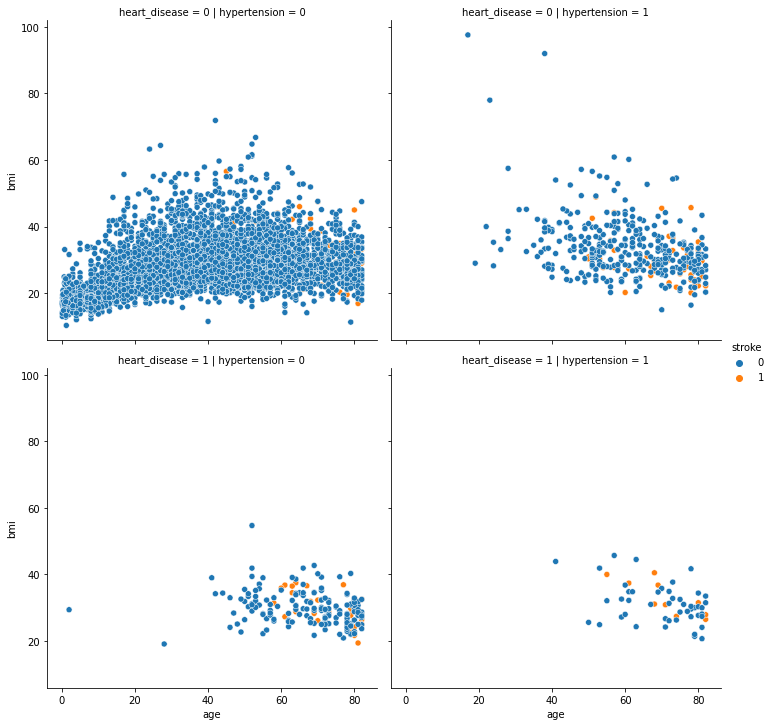

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.relplot(x='age', y='bmi', data=train, row='heart_disease', col='hypertension', hue='stroke')

From the plots above, we can see that the numbers of stroke patients are not really big. There are not a lot of patients, so we need to look more carefully. At the plot that showed people with heart disease and hypertension, there is a quite significant numbers of stroke patients compared to non-stroke patients compared to other plots. **It seems like the patients dwith heart disease and stroke have higher tendency to also have stroke disease**.   

### Smoking Status VS Stroke

Text(0.5, 1.0, 'Age & BMI for Stroked Patients')

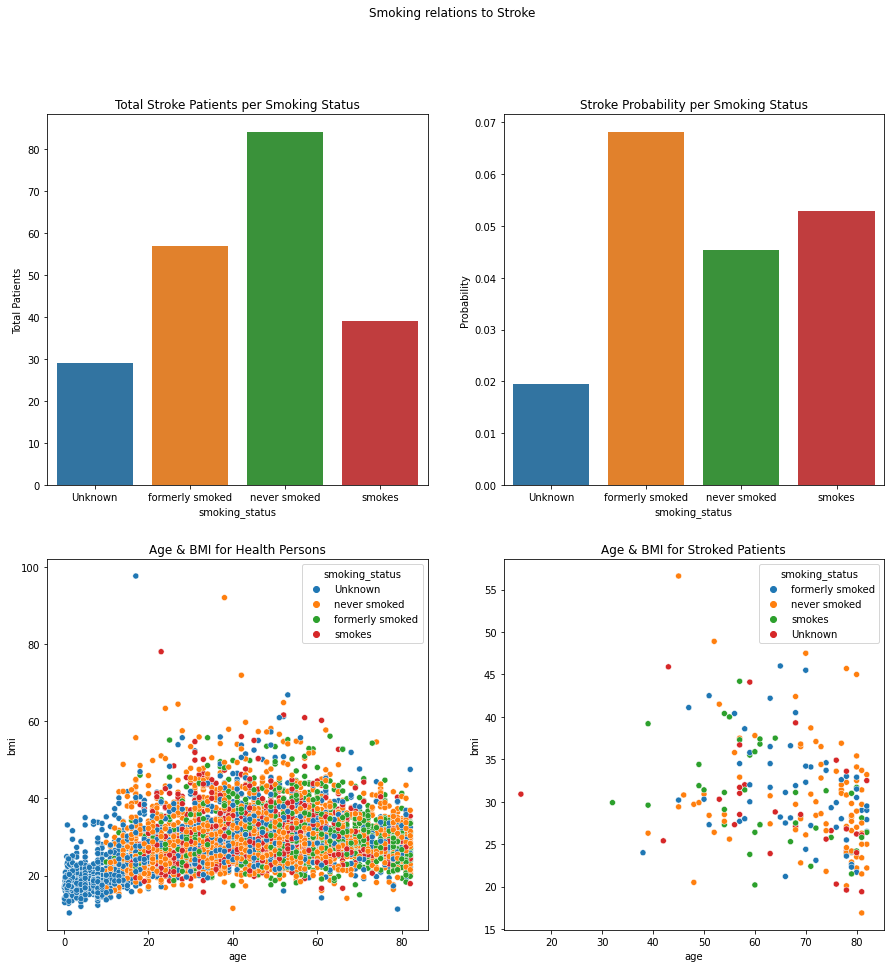

In [6]:
for_graph_1 = train[['smoking_status', 'stroke']].groupby('smoking_status').mean().reset_index()
for_graph_2 = train[['smoking_status', 'stroke']].groupby('smoking_status').sum().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Smoking relations to Stroke')

sns.barplot(data=for_graph_2, x='smoking_status', y='stroke', ax=axes[0, 0])
axes[0, 0].set_title('Total Stroke Patients per Smoking Status')
axes[0, 0].set_ylabel('Total Patients')

sns.barplot(data=for_graph_1, x='smoking_status', y='stroke', ax=axes[0, 1])
axes[0, 1].set_title('Stroke Probability per Smoking Status')
axes[0, 1].set_ylabel('Probability')

sns.scatterplot(data=train[train.stroke == 0], x='age', y='bmi', hue='smoking_status', ax=axes[1, 0])
axes[1, 0].set_title('Age & BMI for Health Persons')

sns.scatterplot(data=train[train.stroke == 1], x='age', y='bmi', hue='smoking_status', ax=axes[1, 1])
axes[1, 1].set_title('Age & BMI for Stroked Patients')

The graph above showed the relations of the patients experience on smoking with their status of having a stroke or not. The first plot which is located on the left top corner, it showed the total patients of stroke from each smoking status (Not smoking, formerly smoking, smoking, and unknown). The unknown data should just be ignored. We can investigate anything from it. From the plot, it showed that there are more patients that never smoked at all than any other smoking status. 

But it doesn't tell all the stories. We can't conclude that smoking doesn't affect or trigger stroke possibility. In order to make an explanation, we need to see other perspectives. Maybe there are just more data on patients of stroke that never smoked at all. That is why we decided to make another plot, but this time we showed that in the probability. **Remember that the probability here is not the probability of occurance of stroke if you are smoking or not, but just a brief representation of this data**.

If we see the probability plot above, **the data told us that there is a higher possibility of stroke occurance if you are a smoker or a former smoker**. 

Then we have other plots at the lower part. We can see from the plot that is located at the lower lef corner that most of the unknown data of patients with age less than 18 are having unknown values on the smoking status. Then at the right bottom corner, we can see that there is only one young patient that is not even a 10 years old that has stroke. And it also has unknown value. 

In [7]:
train = train.rename(columns={'Residence_type':'residence_type'})

### Residence Type VS Stroke

<Figure size 720x1080 with 0 Axes>

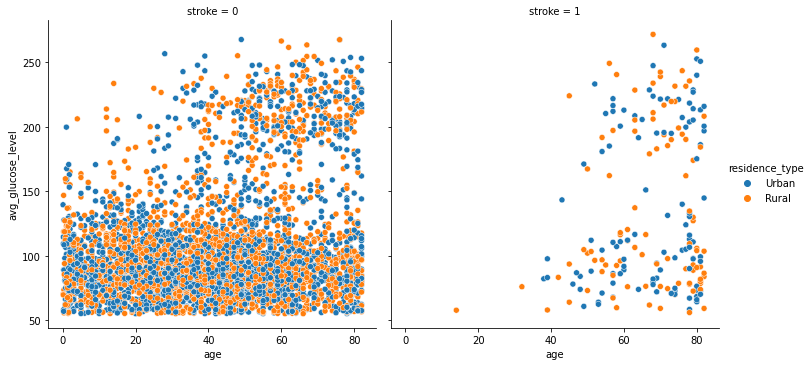

In [8]:
plt.figure(figsize=(10, 15))
sns.relplot(data=train, x='age', y='avg_glucose_level', col='stroke', hue='residence_type')

Above are the plots for residence relations with stroke. **We can barely see the difference, but still we can make a conclusion that people that lived in urban areas, have a little more tendency to have stroke, even in not so significant numbers**. 

### Work Type VS Stroke

Text(0.5, 0, 'Age - Stroke Patients')

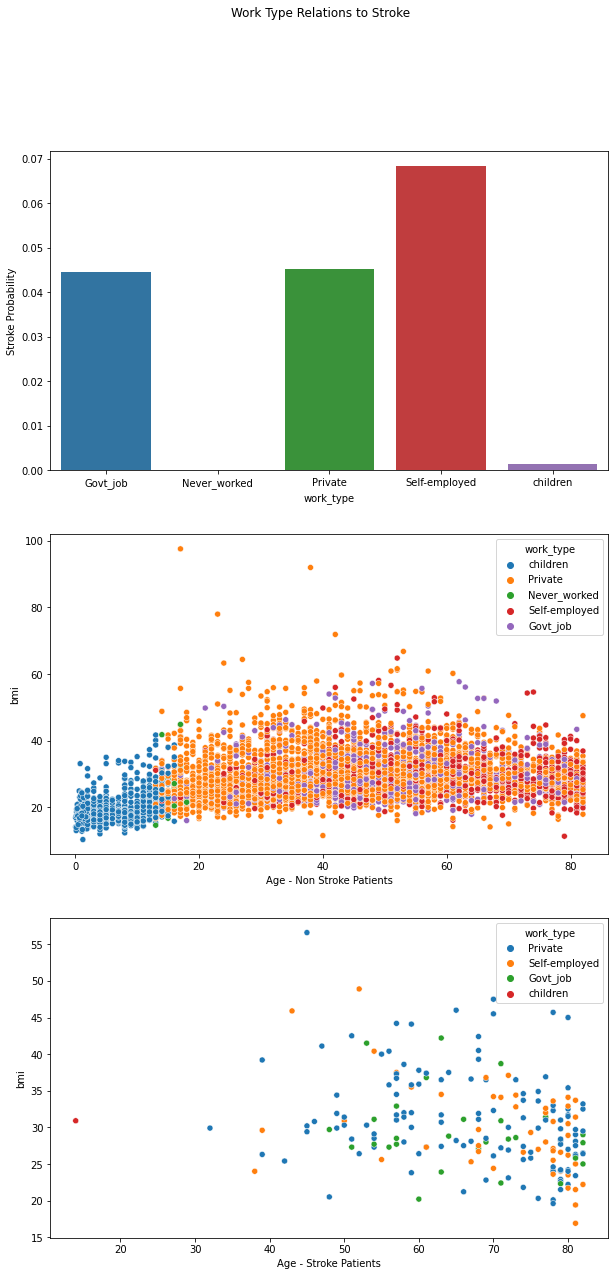

In [9]:
for_graph = train[['stroke', 'work_type']].groupby('work_type').mean()

fig, axes = plt.subplots(3, 1, figsize=(10, 20))
plt.suptitle('Work Type Relations to Stroke')

sns.barplot(data=for_graph.reset_index(), y='stroke', x='work_type', ax=axes[0])
axes[0].set_ylabel('Stroke Probability')

sns.scatterplot(data=train[train.stroke == 0], x='age', y='bmi', hue='work_type', ax=axes[1])
axes[1].set_xlabel('Age - Non Stroke Patients')

sns.scatterplot(data=train[train.stroke == 1], x='age', y='bmi', hue='work_type', ax=axes[2])
axes[2].set_xlabel('Age - Stroke Patients')

From the plot above, it showed that there is no stroke patients that never worked before. From the same plot, **it also showed that the status with highest probability to get stroke is a self-employed**. We can make a lot of assumptions from this information like self-employed worker has more pressure and they need some joy from smoking or even they smoked because they don't have any work at the time. We are not going to move that further analyzing this data.   

### Marriage VS Stroke

Text(0.5, 1.0, 'Stroked Married Man/Woman Age and BMI')

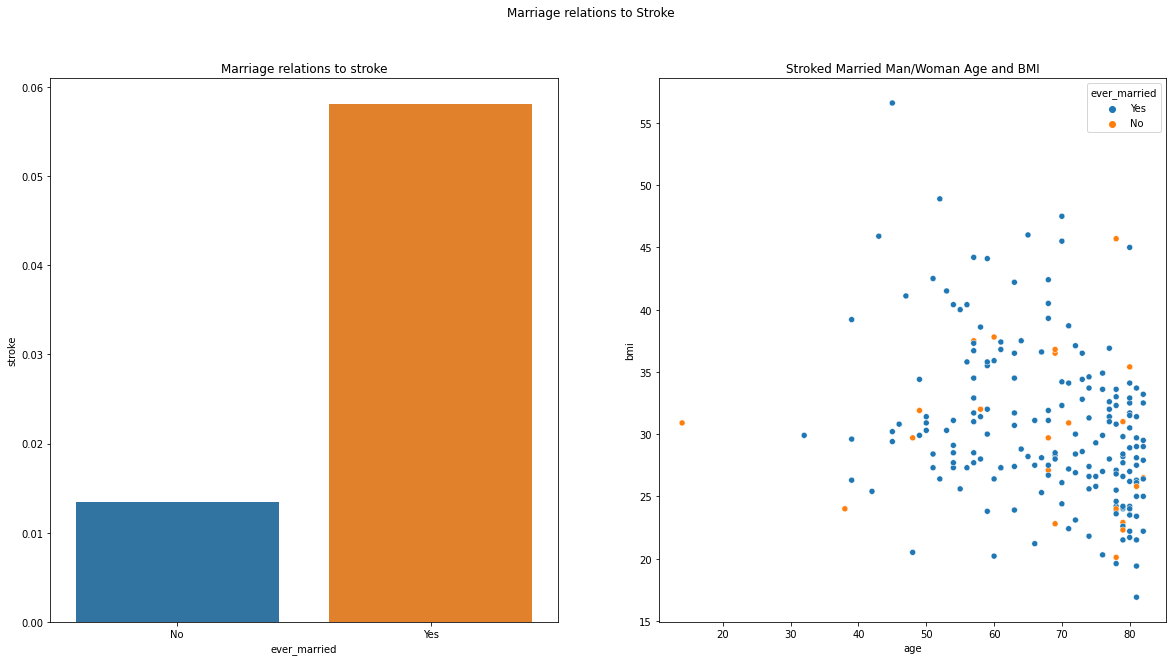

In [10]:
for_graph = train[['ever_married', 'stroke']].groupby('ever_married').mean()

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Marriage relations to Stroke')

sns.barplot(data=for_graph.reset_index(), y='stroke', x='ever_married', ax=axes[0])
axes[0].set_title('Marriage relations to stroke')

sns.scatterplot(data=train[train.stroke == 1], x='age', y='bmi', hue='ever_married', ax=axes[1])
axes[1].set_title('Stroked Married Man/Woman Age and BMI')

From the plot above, the left plot showed the probability of stroke patients whether they ever got married or not. **It showed that someone that is in marriage status or had been on that relationship has higher probability to get stroke**. The other plot which is located at the right side also indicates the same thing. This plot also emphasizes that patients with experience of having a marriage or still in marriage can have stroke doesn't really care about what age they are.

### BMI & Average Glucose Level VS Stroke

Text(0.5, 1.0, 'Age and Glucose Level relations to Stroke')

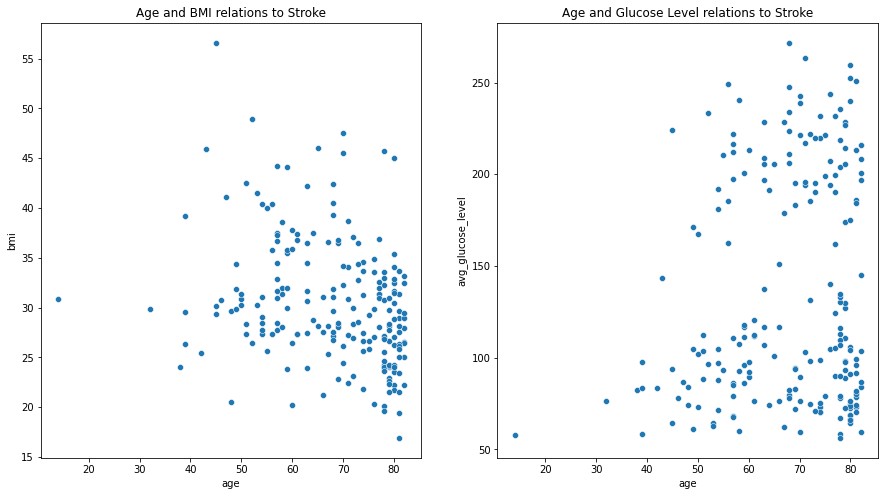

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

sns.scatterplot(data=train[train.stroke == 1], x='age', y='bmi', ax=axes[0])
axes[0].set_title('Age and BMI relations to Stroke')

sns.scatterplot(data=train[train.stroke == 1], x='age', y='avg_glucose_level', ax=axes[1])
axes[1].set_title('Age and Glucose Level relations to Stroke')

Above are plots that showed relations between glucose level and BMI to stroke. BMI is Body Mass Index and the value above 25 indicated that the patient is overweight and the value above 30 indicated that the patient is obese. 

**It showed that stroke attacked patients with older age, not really care about their BMI or glucose level**. 

# Data Preprocessing

This step is data preprocessing step which is a step where we preprocess the data before we enter it to the training session. The purpose of this process is to obtain the best form of data to be trained. In this section, we will be using **Pipeline** and **Column Transformer** to make the process easier later when we want to validate or test the data. 

**Pipeline** is a feature from sklearn that will let you make a series of process for certain type of data in a single function. On this section we make two pipelines. One is for columns that contain object data and the other is for columns that contain data in numbers whether in integer or in float. 

To make the process even simpler, we will combine these two pipelines in a single function. That function is **Column Transformer**. This feature is also coming from sklearn. All that we need to do is to write the combination of these two pipelines in a single line code.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

train_test = train.drop(['id'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(train_test.drop(['stroke'], axis=1),
                                                    train_test.stroke, random_state=42, test_size=0.2) 
num_cols = [c for c in x_train.columns if x_train[c].dtype in ['int', 'float']]
cat_cols = [c for c in x_train.columns if c not in num_cols]

In [13]:
num_pipeline = Pipeline(steps=[('one', SimpleImputer(strategy='mean')), ('two', MinMaxScaler())])
cat_pipeline = Pipeline(steps=[('one', SimpleImputer(strategy='most_frequent')), ('two', OneHotEncoder())])

the_transformer = ColumnTransformer(transformers=[('num', num_pipeline, num_cols), ('cat', cat_pipeline, cat_cols)])
x_train_transformed = the_transformer.fit_transform(x_train)
x_test_transformed = the_transformer.transform(x_test)

From this combination of pipelines and column transformer, we got the new form of data which is **x_train_transformed** and **x_test_transformed** which are data that we would use for training and validation respectively. These data also have been transformed already. 

# Model Building

Next step and this is almost the last step. This step is model building. In this step we will use the data that we transformed before, **x_train_transformed** to be trained. We also heve **y_train**, a single column classification data that we don't need to transform. 

There are many models that we want to build here, because at the end we want to compare the performance of each models. The models that we want to examine are:
1. Linear Regression
2. Logistic Regression
3. Naive-Bayes Gaussian Model
4. K-Nearest Neighbors 
5. Support Vector Machine
6. Decision Tree
7. Ada Boost
8. Random Forest

We will build all these models using the same library, sklearn.

In [14]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

the_classifiers = [LinearRegression(), LogisticRegression(), GaussianNB(), KNeighborsClassifier(), SVC(),
                   DecisionTreeClassifier(), AdaBoostClassifier(), RandomForestClassifier()]
the_names = ['Linear Regression', 'Logistic Regression', 'Gaussian Naive-Bayes', 'K-Nearest Neighbors', 'SVC', 
             'Decision Tree Classifier', 'Ada Boost Classifier', 'Random Forest Classifier']
the_scores = np.zeros(len(the_classifiers))

for i, c in enumerate(the_classifiers):
    clf = c.fit(x_train_transformed, y_train)
    the_scores[i] = clf.score(x_test_transformed, y_test)
    
the_scores = pd.DataFrame(the_scores.reshape(-1, 1), index=the_names, columns=['score'])

## Model Scores

At this section we will se the performance of each model that we already built. The model with highest score is going to be the model that is probably will be used for future use. 

In [15]:
the_scores

,score
Linear Regression,0.089399
Logistic Regression,0.946029
Gaussian Naive-Bayes,0.293279
K-Nearest Neighbors,0.945010
SVC,0.946029
Decision Tree Classifier,0.917515
Ada Boost Classifier,0.945010
Random Forest Classifier,0.945010


From the above table, we can see that the mmodel with the best score, which also indicates the model with the best performance are **Logistic Regression** and **SVC** with the same score, 94.6%. The third and fourth best models are ensemble models that we use here, **Ada Boost** and **Random Forest** with the score 94.5%, a close score to the best model's score. **K-Nearest Neighbors** also have the same score as the ensemble moodel.

The worst model that we got from all this process is Linear Regression. This happen because of the limitation of Linear Regression to process data with many features and many variations. Linear Regression is not a type of model that built to handle this much complications. 

The other model that is not worth being used for this partiular case is Gaussian Naive-Bayes model. With the score 29.3%, it is really not a good idea to use this model. 

# Conclusion

This stroke problem that we have here is a binary classification problem. For this case alone, the best model that we can use are SVM for classification and Logistic Regression with the score of performance 94.6%. The model that we would avoid to use are Naive bayes and Linear Regression. This is because a very poor result and performance from this model.  